Vintage analysis
=============

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Vinatge analysis').getOrCreate()
spark

In [2]:
loan = spark.read.format('csv')\
                    .option('sep', ',')\
                    .option('inferSchema', True)\
                    .option('header', True)\
                    .load('Vintage_student.csv')

loan.show()

+------------+---------------+------------+-----------+------------+-----------+---------+----------------+--------+-------------+------------+---+-----------+------+-------------+
|     Loan_Id|Reporting_Month|Original_EIR|Current_EIR|Original_UPB|Current_UPB|Loan_Term|Origination_date|Loan_Age|Maturity_Date|Original_LTV|DTI|FICO_Origin|Bucket|Delinq_Status|
+------------+---------------+------------+-----------+------------+-----------+---------+----------------+--------+-------------+------------+---+-----------+------+-------------+
|100007365142|      7/20/2000|         8.0|        8.0|       75000|    74693.0|      360|      12/19/1999|       7|    1/20/2030|          79| 62|        763|     0|            0|
|100007365142|      8/20/2000|         8.0|        8.0|       75000|   74587.91|      360|      12/19/1999|       8|    1/20/2030|          79| 62|        763|     0|            0|
|100007365142|      9/20/2000|         8.0|        8.0|       75000|   74534.84|      360|     

In [3]:
loan_set = loan.select('Loan_Id','Reporting_Month','Origination_date','Bucket')
loan_set.show()

+------------+---------------+----------------+------+
|     Loan_Id|Reporting_Month|Origination_date|Bucket|
+------------+---------------+----------------+------+
|100007365142|      7/20/2000|      12/19/1999|     0|
|100007365142|      8/20/2000|      12/19/1999|     0|
|100007365142|      9/20/2000|      12/19/1999|     0|
|100007365142|     10/20/2000|      12/19/1999|     0|
|100007365142|     11/20/2000|      12/19/1999|     0|
|100007365142|     12/20/2000|      12/19/1999|     0|
|100007365142|      1/20/2001|      12/19/1999|     0|
|100007365142|      2/20/2001|      12/19/1999|     0|
|100007365142|      3/20/2001|      12/19/1999|     0|
|100007365142|      4/20/2001|      12/19/1999|     0|
|100007365142|      5/20/2001|      12/19/1999|     0|
|100007365142|      6/20/2001|      12/19/1999|     0|
|100007365142|      7/20/2001|      12/19/1999|     0|
|100007365142|      8/20/2001|      12/19/1999|     0|
|100007365142|      9/20/2001|      12/19/1999|     0|
|100007365

In [4]:
loan_set.printSchema()

root
 |-- Loan_Id: long (nullable = true)
 |-- Reporting_Month: string (nullable = true)
 |-- Origination_date: string (nullable = true)
 |-- Bucket: integer (nullable = true)



In [5]:
from pyspark.sql.functions import col, concat, lit, to_date, to_timestamp, lpad, months_between, round, when

loan_set1 = loan_set.withColumn('Reporting_Month', lpad(col('Reporting_Month'),10,'0'))\
                    .withColumn('Origination_date',lpad(col('Origination_date'),10,'0'))

loan_set2 = loan_set1 \
             .withColumn('Reporting_Month', to_date(to_timestamp(col('Reporting_Month'), 'MM/dd/yyyy').cast('timestamp'))) \
             .withColumn('Origination_date', to_date(to_timestamp(col('Origination_date'), 'MM/dd/yyyy').cast('timestamp'))) \
             .withColumn('Loan_Age', round(months_between(col('Reporting_Month') , col('Origination_date'))).cast('int')) \
             .withColumn('Delq_stat', when(col('Bucket') >= 4, 4).otherwise(col('Bucket')))



loan_set2.filter(col('Bucket') >4).show()

+------------+---------------+----------------+------+--------+---------+
|     Loan_Id|Reporting_Month|Origination_date|Bucket|Loan_Age|Delq_stat|
+------------+---------------+----------------+------+--------+---------+
|100289940808|     2007-01-20|      1999-10-19|     5|      87|        4|
|100366510395|     2001-12-20|      2000-01-20|     5|      23|        4|
|100366510395|     2002-01-20|      2000-01-20|     6|      24|        4|
|100366510395|     2002-02-20|      2000-01-20|     7|      25|        4|
|100366510395|     2002-03-20|      2000-01-20|     8|      26|        4|
|100366510395|     2002-04-20|      2000-01-20|     9|      27|        4|
|100366510395|     2002-05-20|      2000-01-20|    10|      28|        4|
|100366510395|     2002-06-20|      2000-01-20|    11|      29|        4|
|100366510395|     2002-07-20|      2000-01-20|    12|      30|        4|
|100366510395|     2002-08-20|      2000-01-20|    13|      31|        4|
|100366510395|     2002-09-20|      20

In [6]:
loan_set2.printSchema()

root
 |-- Loan_Id: long (nullable = true)
 |-- Reporting_Month: date (nullable = true)
 |-- Origination_date: date (nullable = true)
 |-- Bucket: integer (nullable = true)
 |-- Loan_Age: integer (nullable = true)
 |-- Delq_stat: integer (nullable = true)



In [7]:
print(loan_set2.count(), len(loan_set2.columns))

761403 6


In [8]:
loan_set3 = loan_set2.select('Loan_Id', 'Loan_Age', 'Delq_stat').orderBy(col('Loan_Id').asc(),col('Loan_Age').asc())
loan_set3.show()

+------------+--------+---------+
|     Loan_Id|Loan_Age|Delq_stat|
+------------+--------+---------+
|100007365142|       7|        0|
|100007365142|       8|        0|
|100007365142|       9|        0|
|100007365142|      10|        0|
|100007365142|      11|        0|
|100007365142|      12|        0|
|100007365142|      13|        0|
|100007365142|      14|        0|
|100007365142|      15|        0|
|100007365142|      16|        0|
|100007365142|      17|        0|
|100007365142|      18|        0|
|100007365142|      19|        0|
|100007365142|      20|        0|
|100007365142|      21|        0|
|100007365142|      22|        0|
|100007365142|      23|        0|
|100007365142|      24|        0|
|100007365142|      25|        0|
|100007365142|      26|        0|
+------------+--------+---------+
only showing top 20 rows



In [9]:
from pyspark.sql.functions import first

loan_set30_DPD = loan_set3.filter(col('Delq_stat') == 1).groupBy(col('Loan_Id')).agg(first('Loan_Age').alias('dpd_30'))\
                .withColumnRenamed('Loan_Id', "LoanId_30_dpd")

loan_set30_DPD_1 = loan_set30_DPD.groupBy(col('dpd_30')).count().sort(col('dpd_30'))\
                    .withColumnRenamed('count', "dpd_30_mnths")

loan_set60_DPD = loan_set3.filter(col('Delq_stat') == 2).groupBy(col('Loan_Id')).agg(first('Loan_Age').alias('dpd_60'))\
                .withColumnRenamed('Loan_Id', "LoanId_60_dpd")

loan_set60_DPD_1 = loan_set60_DPD.groupBy(col('dpd_60')).count().sort(col('dpd_60'))\
                     .withColumnRenamed('count', "dpd_60_mnths")

loan_set90_DPD = loan_set3.filter(col('Delq_stat') == 3).groupBy(col('Loan_Id')).agg(first('Loan_Age').alias('dpd_90'))\
                .withColumnRenamed('Loan_Id', "LoanId_90_dpd")

loan_set90_DPD_1 = loan_set90_DPD.groupBy(col('dpd_90')).count().sort(col('dpd_90')) \
                     .withColumnRenamed('count', "dpd_90_mnths")

loan_set30_DPD_1.show(5)
loan_set60_DPD_1.show(5)
loan_set90_DPD_1.show(5)

+------+------------+
|dpd_30|dpd_30_mnths|
+------+------------+
|     6|           6|
|     7|         170|
|     8|         252|
|     9|         189|
|    10|         186|
+------+------------+
only showing top 5 rows

+------+------------+
|dpd_60|dpd_60_mnths|
+------+------------+
|     6|           2|
|     7|          21|
|     8|          31|
|     9|          32|
|    10|          33|
+------+------------+
only showing top 5 rows

+------+------------+
|dpd_90|dpd_90_mnths|
+------+------------+
|     6|           2|
|     7|          11|
|     8|          16|
|     9|          16|
|    10|          10|
+------+------------+
only showing top 5 rows



In [10]:
# Create a DataFrame with an 'Age' column
age_df = spark.createDataFrame([(age,) for age in range(1, 61)], ["Age"])

# Show the resulting DataFrame
age_df.show()

+---+
|Age|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
| 20|
+---+
only showing top 20 rows



In [41]:
loan_combine = age_df.join(loan_set30_DPD_1, on=age_df['Age'] == loan_set30_DPD_1['dpd_30'], how = 'left')
loan_combine = loan_combine.sort(col('Age'))

loan_combine = loan_combine.join(loan_set60_DPD_1, 
                                     on=loan_combine['Age'] == loan_set60_DPD_1['dpd_60'],
                                             how = 'left')

loan_combine = loan_combine.join(loan_set90_DPD_1, 
                                     on=loan_combine['Age'] == loan_set90_DPD_1['dpd_90'], 
                                         how = 'left')

loan_combine = loan_combine.select('Age','dpd_30_mnths', 'dpd_60_mnths', 'dpd_90_mnths').orderBy(col('Age'))
loan_combine = loan_combine.na.fill(0)
loan_combine.show()

+---+------------+------------+------------+
|Age|dpd_30_mnths|dpd_60_mnths|dpd_90_mnths|
+---+------------+------------+------------+
|  1|           0|           0|           0|
|  2|           0|           0|           0|
|  3|           0|           0|           0|
|  4|           0|           0|           0|
|  5|           0|           0|           0|
|  6|           6|           2|           2|
|  7|         170|          21|          11|
|  8|         252|          31|          16|
|  9|         189|          32|          16|
| 10|         186|          33|          10|
| 11|         198|          49|           9|
| 12|         200|          38|          25|
| 13|         199|          34|          13|
| 14|         152|          28|          15|
| 15|         148|          26|          26|
| 16|         136|          37|          18|
| 17|         132|          33|          19|
| 18|         134|          44|          15|
| 19|         130|          35|          21|
| 20|     

In [45]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas DataFrame
pandas_df = loan_combine.toPandas()
pandas_df

,Age,dpd_30_mnths,dpd_60_mnths,dpd_90_mnths
0,1,0,0,0
1,2,0,0,0
2,3,0,0,0
3,4,0,0,0
4,5,0,0,0
5,6,6,2,2
6,7,170,21,11
7,8,252,31,16
8,9,189,32,16
9,10,186,33,10


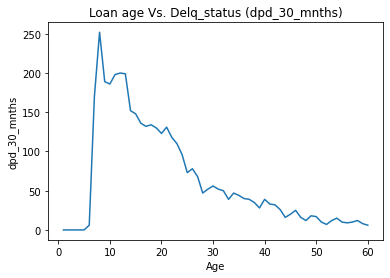

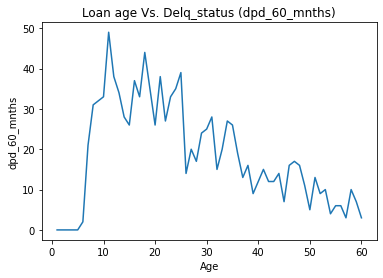

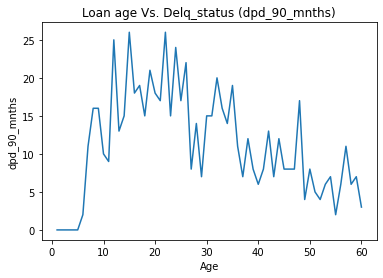

In [53]:
# Plot the line chart
cols = ['dpd_30_mnths' ,'dpd_60_mnths', 'dpd_90_mnths']
for col in cols:
    plt.plot(pandas_df['Age'], pandas_df[col])
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.title("Loan age Vs. Delq_status (" + col + ")")
    plt.show()